In [ ]:
## Everything was deleted because I ran out of memory, so now I need to rewrite the entire plootting script for everythin
# FUCK FUCK FUCK

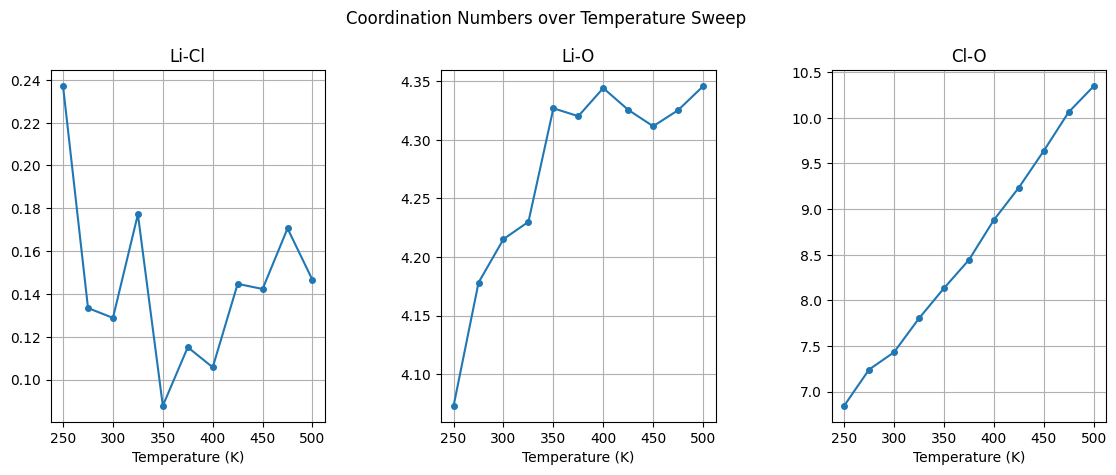

In [15]:
## Coordination numbers from setonix.
LiCl_coord = [0.2370, 0.1334, 0.1288, 0.1772, 0.08775, 0.1151, 0.1057, 0.1447, 0.1423, 0.1706, 0.1465]
LiO_coord = [4.0730, 4.1782, 4.2153, 4.2301, 4.3270, 4.3203, 4.3443, 4.3257, 4.3117, 4.3254, 4.3458]
ClO_coord = [6.8443, 7.2413, 7.4306, 7.8018, 8.1321, 8.4418, 8.8795, 9.2338, 9.6365, 10.0622, 10.3453]
temps = [250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500]

# Imports
from matplotlib import pyplot as plt

[fig, axs] = plt.subplots(1,3)

# plt.plot(temps, LiCl_coord, temps, LiO_coord, temps, ClO_coord)
axs[0].plot(temps, LiCl_coord, marker='.', markersize=8)
axs[0].set_title("Li-Cl")
axs[1].plot(temps, LiO_coord, marker='.', markersize=8)
axs[1].set_title("Li-O")
axs[2].plot(temps, ClO_coord, marker='.', markersize=8)
axs[2].set_title("Cl-O")
# plt.legend(["Li-Cl", "Li-O", "Cl-O"])
axs[0].set_xlabel("Temperature (K)")
axs[1].set_xlabel("Temperature (K)")
axs[2].set_xlabel("Temperature (K)")
axs[0].grid()
axs[1].grid()
axs[2].grid()
fig.suptitle("Coordination Numbers over Temperature Sweep")
fig.tight_layout()
fig.set_size_inches(12,4.8)
fig.savefig("coord_nums_2.pdf", dpi=800)
fig.show()

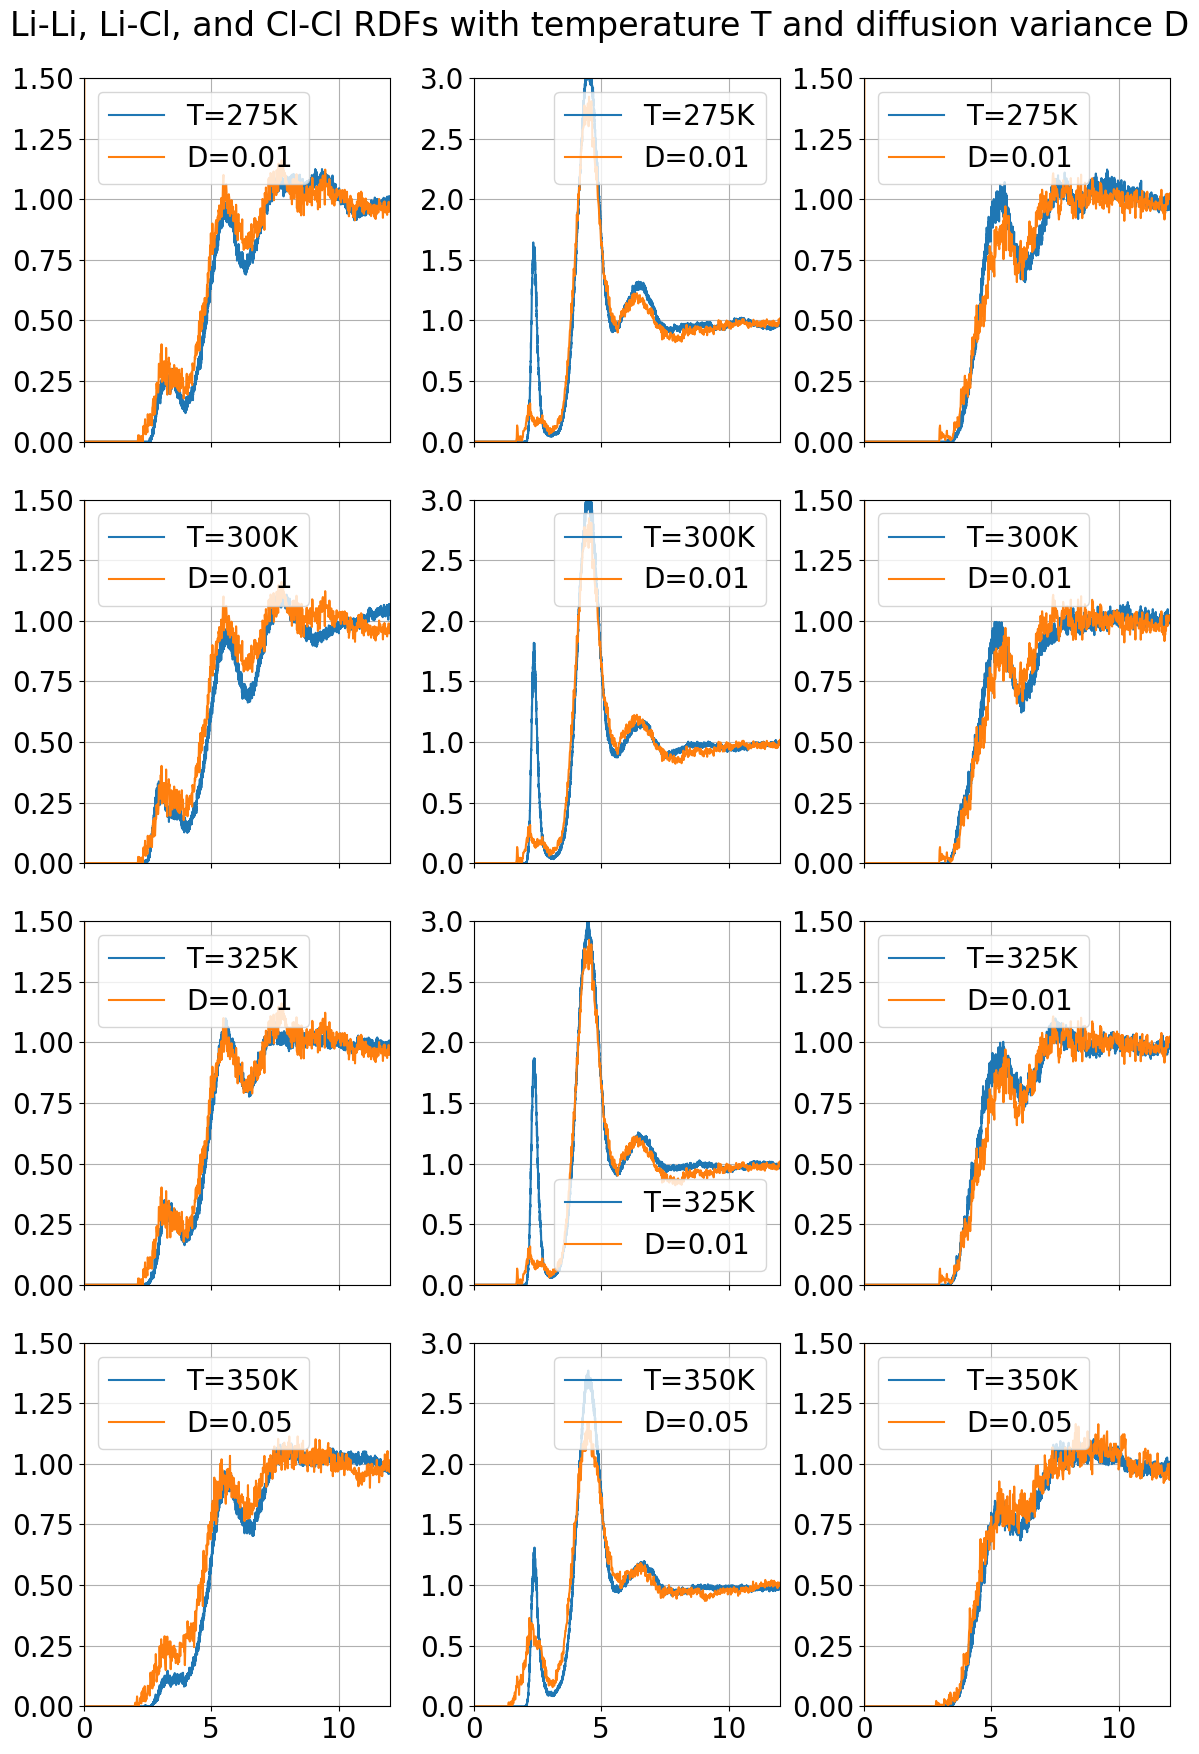

In [15]:
# plots each diffusion separately against a temperature
temp_list = [275, 300, 325, 350]
disp_list=temp_list
diff_list = [0.01, 0.01, 0.01, 0.05]
import pickle
from matplotlib import pyplot as plt
import MDAnalysis as mda
from MDAnalysis.analysis import rdf

import tqdm as notebook_tqdm # some notebook stuff?

def parse(in_stream, delim):
    out_arr = []
    in_arr = in_stream.split(delim)
    for str_num in in_arr:
        if len(str_num) == 0:
            continue
        out_arr.append(float(str_num))
    return out_arr

type_list = ["Li-Li", "Li-Cl", "Cl-Cl"]
type_short = ["LiLi", "LiCl", "ClCl"]
heights = [1.5, 3, 1.5]

N = len(disp_list)
M = len(type_list)
# plots each matching separately
plt.rcParams.update({'font.size': 20})
fig, axs = plt.subplots(N, M, sharex=True)

# Plotting each temp/diff model
for i in range(N):
    # Plotting each RDF
    for j in range(M):
        # Access temperature model
        file = open(f"data-{disp_list[i]}K-rdf.data", 'rb')
        data = pickle.load(file)
        file.close()
        # Access diffusion model
        bin = open(f"../variances/v={diff_list[i]}/Diff_RDFs/{type_short[j]}Bins", 'r')
        res = open(f"../variances/v={diff_list[i]}/Diff_RDFs/{type_short[j]}Results", 'r')
        x = parse(bin.read(), '\n')
        y = parse(res.read(), '\n')
        bin.close()
        res.close()
        # Plot RDFs
        axs[i,j].plot(data[j][0], data[j][1], x, y)
        # Options
        axs[i,j].set_xlim([0,12])
        axs[i,j].set_ylim([0,heights[j]])
        axs[i,j].grid()
        axs[i,j].legend([f"T={disp_list[i]}K", f"D={diff_list[i]}"])

fig.set_size_inches(12,18)
fig.suptitle("Li-Li, Li-Cl, and Cl-Cl RDFs with temperature T and diffusion variance D")
fig.tight_layout()

fig.savefig("small-comp.svg", dpi=300)
fig.show()